In [11]:

####################################### Reinforcement Learning: Stochastic  Case #################################################################
import numpy as np
import random
import matplotlib.pyplot as plt
from random import randint


def get_initial_boardState():
    qTable = {}
    
    for i in range (0,12):
        for j in range(0,4): # Four Values represent UP, DOWN, LEFT , RIGHT RESPECTIVELY
            qTable.setdefault(i,[]).append(randint(1,100) * 0.0001)    # Providing the random initial value.
    
    # 0 - UP, 1- DOWN, 2-LEFT, 3-RIGHT
    #Defining the restrictions of the action on the boundary states accroding to the board, giving them the value as -1
   
    qTable[0][0] = -1
    qTable[0][2] = -1
    
    qTable[1][0] = -1
    
    qTable[2][0] = -1
    
    qTable[3][0] = -1
    qTable[3][3] = -1
    
    qTable[4][2] = -1
    
    # Since s6 is our goal State --- here indexed at 5 as we are using the zero indexed problems
    qTable[5][0] = -1
    qTable[5][1] = -1
    qTable[5][2] = -1
    qTable[5][3] = -1

    
    
    qTable[7][3] = -1
    
    qTable[8][1] = -1
    qTable[8][2] = -1
    
    qTable[9][1] = -1
    
    qTable[10][1] = -1
    
    qTable[11][1] = -1
    qTable[11][3] = -1
    print 'Initial State'
    print_board(qTable)
    return qTable
    

# Print Board Values
def print_board(qTable):
    for i in range(0,12):
        print 's' + str(i+1), qTable[i]

def Get_Random_Move(movesCnt):
    return randint(0,movesCnt);

def Get_Random_State(statesCnt):
    return randint(0,statesCnt)

def get_probability():
    return random.uniform(0, 1)

def get_probablistic_action(qTable, source_state, intended_action):
    num_possible_moves = 0
    nonintendedprob = 0.0
    possibleStates = []
    
    for i in range(0,4):
        if qTable[source_state][i] != -1 and i != intended_action:
            possibleStates.append(i)
            num_possible_moves += 1
    
    probability = random.uniform(0, 1)
    
    if probability <= 0.7:
        return intended_action
    else:
        if num_possible_moves == 1:
            return possibleStates[0]
        elif num_possible_moves == 2:
            if probability <= 0.85:
                return possibleStates[0]
            else:
                return possibleStates[1]
        elif num_possible_moves == 3:
            if probability <= 0.80:
                return possibleStates[0]
            elif probability <=0.9:
                return possibleStates[1]
            else:
                return possibleStates[2]
        else:
            print 'Error Occured Check your Code'
            
            

def Get_target_state(Current_State, move):
    map_move = {
        0 : -4,
        1 : +4,
        2 : -1,
        3 : +1,
    }
    return Current_State + map_move[move]
    
    
def q_Learning(qTable, gamma, epsilon):
    
    visits_count = [[0 for x in range(4)] for y in range(12)] 
    expected_reward = [[0 for x in range(4)] for y in range(12)] 
    
    states_Cnt = 11 # 0 indexed
    moves_Cnt = 3   # 0 indexed
    
    intended_move = 0
    probablistic_move = 0
    alpha = 0.0
    
    current_diff = 0
    prev_diff = 0
    prev_QTableSum = 0
    currentQTableSum = 0
    breakingCounter = 0
    first_Move = True
    
    goal_state = 5
    num_iterations =0
    source_state = 0
    target_state = 0
    inGoalState = True
    
    #PLot Data
    plot_data = []
    
    while True:
        num_iterations += 1
        
        #Compute the Q-Value by randomly selecting the state action move
        maxQval = -1
        greedy_Max = -1
        reward = 0        
        
        if inGoalState or source_state == goal_state:
            source_state = Get_Random_State(states_Cnt)
        else:
            if not first_Move:
                source_state = target_state
        
        if get_probability() > (1-epsilon):                  # Random Move
            intended_move = Get_Random_Move(moves_Cnt)
        else:   # greedy Move
            for i in range(0,4):
                if qTable[source_state][i] > greedy_Max:
                    greedy_Max = qTable[source_state][i]
                    intended_move = i

        if(qTable[source_state][intended_move] == -1):
            continue
        
        #Find the probabilistic Move
        probablistic_move = get_probablistic_action(qTable, source_state, intended_move)
            
        #Check the move is valid or not
        
        if(qTable[source_state][probablistic_move] != -1):
            first_Move = False
            target_state = Get_target_state(source_state , probablistic_move)

            for i in range(0,4):
                if qTable[target_state][i] > maxQval:
                    maxQval = qTable[target_state][i]
            
            if target_state == goal_state:
                reward = 100
                inGoalState = True
                first_Move = True
                maxQval = 0
                expected_reward[source_state][intended_move] += reward

            visits_count[source_state][intended_move]  += 1
            
            alpha = 1 /(float)(1 + visits_count[source_state][intended_move])
            qTable[source_state][intended_move] = ((1-alpha) * qTable[source_state][intended_move]) + (alpha * (reward + (gamma * maxQval)))
            
        for val, list_val in qTable.items():
            for item in list_val:
                if(item != -1):
                    currentQTableSum += item
    
        current_diff = abs(currentQTableSum - prev_QTableSum)
        
        plot_data.append(current_diff)
        
        prev_QTableSum = currentQTableSum
        currentQTableSum = 0


#         if current_diff == 0 and prev_diff == 0:
        if (current_diff - prev_diff) < 0.1:
            breakingCounter += 1
        else:
            breakingCounter = 0;
        
        prev_diff = current_diff

        if breakingCounter >= 100:
            print 'End State'
            print_board(qTable)
            print 'Expected Values: '
            print_expected_rewards(expected_reward, visits_count)
            return plot_data


def print_expected_rewards(expected_reward, visits_count):
    print 'Expected Values of four States  S2, S5, S7, S10'
    print
    print 'S2 DOWN', expected_reward[1][1]/(float)(visits_count[1][1])
    print 'S2 LEFT', expected_reward[1][2]/(float)(visits_count[1][2])
    print 'S2 RIGHT', expected_reward[1][3]/(float)(visits_count[1][3])
    print
    print 'S5 UP', expected_reward[4][0]/(float)(visits_count[4][0])
    print 'S5 DOWN', expected_reward[4][1]/(float)(visits_count[4][1])
    print 'S5 RIGHT', expected_reward[4][3]/(float)(visits_count[4][3])
    print
    print 'S7 UP', expected_reward[6][0]/(float)(visits_count[6][0])
    print 'S7 DOWN', expected_reward[6][1]/(float)(visits_count[6][1])
    print 'S7 LEFT', expected_reward[6][2]/(float)(visits_count[6][2])
    print 'S7 RIGHT', expected_reward[6][3]/(float)(visits_count[6][3])
    print
    print 'S10 UP', expected_reward[9][0]/(float)(visits_count[9][0])
    print 'S10 LEFT', expected_reward[9][2]/(float)(visits_count[9][2])
    print 'S10 RIGHT', expected_reward[9][3]/(float)(visits_count[4][3])
    
    
        
import matplotlib.pyplot as plt
def plot_graph(values, title):
    plt.plot(values)
    plt.ylabel('Q(t+1) - Q(t)')
    plt.xlabel('Iterations')
    plt.title(title)
    plt.show()
    
    




Initial State
s1 [-1, 0.0001, -1, 0.0006000000000000001]
s2 [-1, 0.0024000000000000002, 0.0081, 0.0021000000000000003]
s3 [-1, 0.008400000000000001, 0.0079, 0.0089]
s4 [-1, 0.0011, 0.0058000000000000005, -1]
s5 [0.0071, 0.0089, -1, 0.0039000000000000003]
s6 [-1, -1, -1, -1]
s7 [0.0006000000000000001, 0.0066, 0.0048000000000000004, 0.0089]
s8 [0.0011, 0.008400000000000001, 0.0007, -1]
s9 [0.0048000000000000004, -1, -1, 0.006]
s10 [0.00030000000000000003, -1, 0.0055000000000000005, 0.0014]
s11 [0.01, -1, 0.0088, 0.0068000000000000005]
s12 [0.009300000000000001, -1, 0.0053, -1]
End State
s1 [-1, 77.27802798840341, -1, 78.46005393345966]
s2 [-1, 89.13030286537335, 64.73329990723406, 67.73418324342879]
s3 [-1, 65.57479870545608, 75.65013145632307, 58.470514189225625]
s4 [-1, 62.7425803741992, 46.25873128205467, -1]
s5 [69.93235188950028, 58.91580328686568, -1, 88.93811333502279]
s6 [-1, -1, -1, -1]
s7 [64.27419816112263, 62.70286816061716, 88.97343506560624, 53.64096678124545]
s8 [56.535803

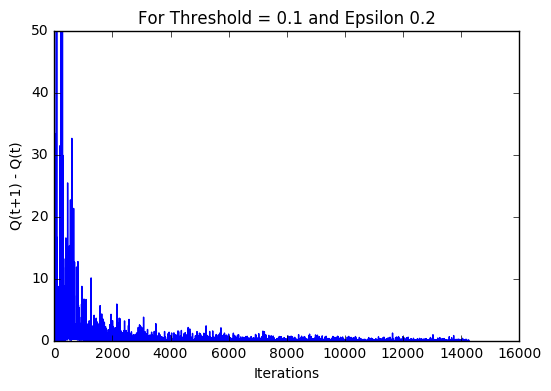

Initial State
s1 [-1, 0.0002, -1, 0.0025]
s2 [-1, 0.0082, 0.0088, 0.0026000000000000003]
s3 [-1, 0.0015, 0.008, 0.0023]
s4 [-1, 0.0013000000000000002, 0.0067, -1]
s5 [0.0053, 0.007, -1, 0.006900000000000001]
s6 [-1, -1, -1, -1]
s7 [0.0067, 0.0044, 0.0005, 0.0011]
s8 [0.0082, 0.01, 0.00030000000000000003, -1]
s9 [0.0053, -1, -1, 0.0095]
s10 [0.01, -1, 0.0015, 0.0098]
s11 [0.0001, -1, 0.0051, 0.002]
s12 [0.0027, -1, 0.0011, -1]
End State
s1 [-1, 78.16846004883512, -1, 75.10495865458871]
s2 [-1, 87.4295769527555, 70.60866456615774, 63.640669158496145]
s3 [-1, 67.15806995202652, 70.23574487896103, 53.44264514437992]
s4 [-1, 57.74071668456332, 49.214933705585295, -1]
s5 [68.67939969350998, 70.79568635276397, -1, 90.2013200563338]
s6 [-1, -1, -1, -1]
s7 [59.32283722272484, 62.70038926341019, 87.06554063855394, 60.19650809808001]
s8 [50.562913984078634, 46.688513232745564, 67.39268520781087, -1]
s9 [79.15913080511251, -1, -1, 78.04692763702019]
s10 [89.51322378120163, -1, 73.44707299919656, 6

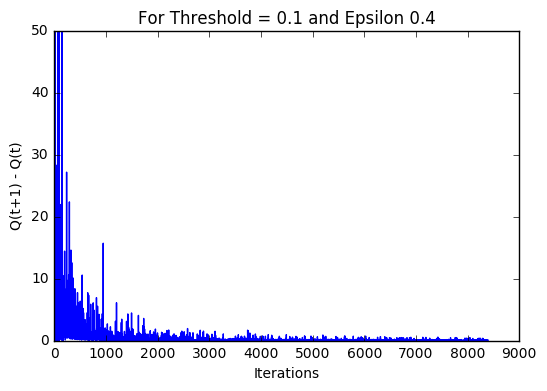

Initial State
s1 [-1, 0.007, -1, 0.0032]
s2 [-1, 0.0054, 0.0071, 0.0015]
s3 [-1, 0.0046, 0.0089, 0.0009000000000000001]
s4 [-1, 0.0005, 0.0054, -1]
s5 [0.0071, 0.0019, -1, 0.006200000000000001]
s6 [-1, -1, -1, -1]
s7 [0.0015, 0.0028, 0.0043, 0.005200000000000001]
s8 [0.0057, 0.0015, 0.0055000000000000005, -1]
s9 [0.006500000000000001, -1, -1, 0.0011]
s10 [0.005200000000000001, -1, 0.006, 0.005200000000000001]
s11 [0.005, -1, 0.006900000000000001, 0.0041]
s12 [0.0066, -1, 0.0083, -1]
End State
s1 [-1, 69.97232772243704, -1, 72.86447673943972]
s2 [-1, 85.3983248795581, 62.11473575380356, 61.38683981496795]
s3 [-1, 68.72866945932459, 65.39757268306944, 48.41945091777532]
s4 [-1, 52.96760372424347, 48.05797043237811, -1]
s5 [62.124606488824625, 69.37805102288803, -1, 87.44536302623173]
s6 [-1, -1, -1, -1]
s7 [60.686955970410175, 59.576288757502475, 86.87385887772159, 56.14826727769688]
s8 [45.293174254437325, 46.65095984802701, 64.11529990805872, -1]
s9 [71.42706125036004, -1, -1, 77.55408

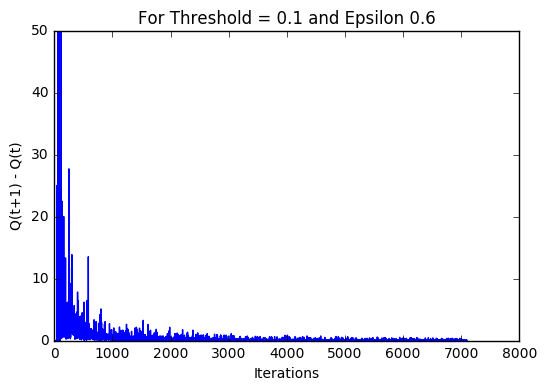

Initial State
s1 [-1, 0.0088, -1, 0.007500000000000001]
s2 [-1, 0.0074, 0.006, 0.0006000000000000001]
s3 [-1, 0.0029000000000000002, 0.0045000000000000005, 0.0004]
s4 [-1, 0.0039000000000000003, 0.006200000000000001, -1]
s5 [0.0022, 0.006, -1, 0.0056]
s6 [-1, -1, -1, -1]
s7 [0.009000000000000001, 0.0092, 0.009600000000000001, 0.0013000000000000002]
s8 [0.006, 0.0071, 0.0061, -1]
s9 [0.0077, -1, -1, 0.0064]
s10 [0.0027, -1, 0.006, 0.008]
s11 [0.0092, -1, 0.0063, 0.0021000000000000003]
s12 [0.0005, -1, 0.0045000000000000005, -1]
End State
s1 [-1, 77.49998225276309, -1, 78.56601374047641]
s2 [-1, 88.9759287584294, 73.18426240859276, 69.51921688794232]
s3 [-1, 72.42908589921574, 75.0477247824967, 59.025887416497355]
s4 [-1, 57.58060720457034, 61.99321809609791, -1]
s5 [73.59512952949709, 72.26842655104312, -1, 90.05569402205907]
s6 [-1, -1, -1, -1]
s7 [65.99209639196287, 66.53774008532316, 89.64016069308484, 60.29171860818166]
s8 [54.31936390460623, 54.02175497185512, 68.81748837513119, -1

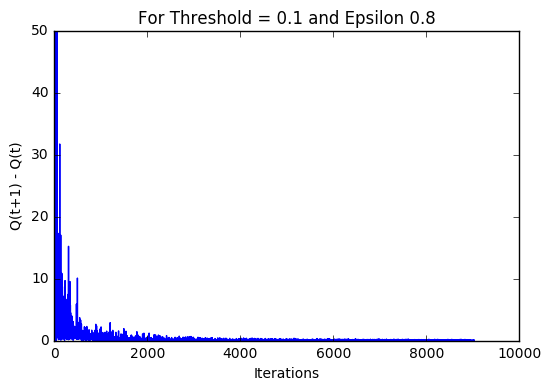

Initial State
s1 [-1, 0.007, -1, 0.0038]
s2 [-1, 0.0029000000000000002, 0.0095, 0.007]
s3 [-1, 0.0086, 0.001, 0.01]
s4 [-1, 0.0031000000000000003, 0.0063, -1]
s5 [0.0014, 0.008700000000000001, -1, 0.001]
s6 [-1, -1, -1, -1]
s7 [0.0009000000000000001, 0.0086, 0.0004, 0.0026000000000000003]
s8 [0.0083, 0.0081, 0.0011, -1]
s9 [0.0036000000000000003, -1, -1, 0.0078000000000000005]
s10 [0.008700000000000001, -1, 0.0026000000000000003, 0.0044]
s11 [0.0081, -1, 0.0066, 0.0049]
s12 [0.0089, -1, 0.0023, -1]
End State
s1 [-1, 77.71694779308609, -1, 77.65295840536022]
s2 [-1, 88.97215376085546, 67.1024957038105, 62.797333163948444]
s3 [-1, 67.69144085724692, 69.35596903944767, 48.33508220122399]
s4 [-1, 49.66340485207314, 52.75589949815106, -1]
s5 [67.89293985917905, 68.07315562386026, -1, 89.78342185835564]
s6 [-1, -1, -1, -1]
s7 [58.96622120634521, 60.292550911366114, 85.09307712548448, 54.91670454099682]
s8 [43.848325183799766, 43.98825414084444, 62.68326109921741, -1]
s9 [76.56779187807244, -

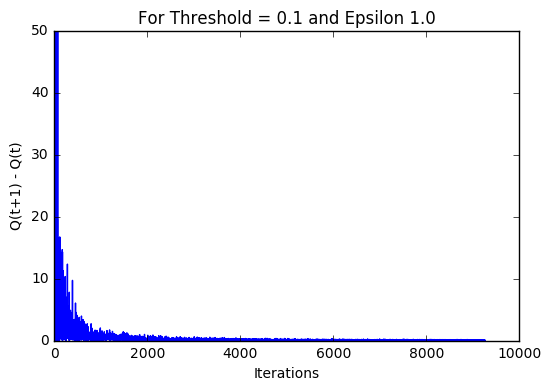

In [12]:
# qTable = get_initial_boardState()

# gamma = 0.9
# plot_data = q_Learning(qTable, gamma)
# plot_graph(plot_data, 'For Threshold 0.1')

gamma = 0.9
epsilon_values = np.arange(0.2,1.2,0.2)

for val in epsilon_values:
    qTable = get_initial_boardState()
    plot_data = q_Learning(qTable, gamma, val)
    plot_graph(plot_data, 'For Threshold = 0.1 and Epsilon ' + str(val))